<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<center><h1>Simple RNN vs LSTM vs GRU</center>

---
# **Table of Contents**
---

**1.**	[**Probelm Description**](#section1)<br>
**2.**	[**Importing Libraries**](#section2)<br>
**3.**	[**Data Description and Preprocessing**](#section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)

**4.**	[**SimpleRNN Model**](#section4)<br>
  - **4.1** [**Model Building**](#Section31)
  - **4.2** [**Model Evaluation**](#Section31)

**5.**	[**LSTM Model**](#section6)<br>
  - **5.1** [**Model Building**](#Section31)
  - **5.2** [**Model Evaluation**](#Section31)

**6.**	[**GRU Model**](#section6)<br>
  - **6.1** [**Model Building**](#Section31)
  - **6.2** [**Model Evaluation**](#Section31)

**7.** [**Conclusion**](#section7)<br>

---
<a name = Section1></a>
# **1. Problem Description**
---

- Classifying **movie** reviews: a **binary** classification example.

- **Two-class** classification, or **binary classification**, may be the most **widely** applied kind of machine-learning **problem**.
 
 - In this tutorial, we will see **how** **Simple RNN, LSTM** and **GRU** performing at **classifying** movie reviews as **positive** or **negative**, based on the text content of the **reviews**.

---
<a name = Section3></a>
# **2. Installing & Importing Libraries**
---

In [1]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import string
from string import punctuation
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore') 

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout,GRU,SimpleRNN
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score


In [5]:
from tensorflow.keras.layers import TextVectorization

 **Note:**
 
 - We are **encountering** an error while loading **dataset** from keras library with numpy 1.16
 
 - So install **numpy 1.14** using below cell and **restart** the session.
 
 - You don't have to **re-run** the below cell once you have **restarted** the session after installing numpy 1.14

In [6]:
# If current version of numpy gives an error while running the dataset below, then run this cell.
# Otherwise skip this cell.

# !pip install numpy==1.14.2

# Restart the session after installing and don't run this cell again after restarting the session

---
<a name = Section4></a>
# **3. Data Description and Preprocessing**
---

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/dataset-original.jpg" width="800" height="400" /></center>

**The IMDB dataset**

 - You’ll work with the **IMDB** dataset: a set of **50,000** highly polarized reviews from the Internet **Movie** Database.  
 
 - They’re split into **25,000 reviews for training** and **25,000 reviews for testing**, each set consisting of **50% negative** and **50% positive reviews**.
 
 - The IMDB dataset **comes packaged with Keras**. It has
**already been preprocessed**: the reviews (sequences of words) have been turned into sequences of integers, where each **integer** stands for a **specific** word in a dictionary.

 - The argument **num_words=10000** means you’ll only keep the top **10,000** most frequently occurring words in the training data. 

- Rare words will be **discarded**. This allows you to work with vector data of manageable size.

- The variables **train_data** and **test_data** are **lists of reviews**; each review is a list of word indices (encoding a sequence of words). 

- **train_labels** and **test_labels** are lists of 0s and 1s, where **0** stands for **negative** and **1** stands for positive.

In [7]:
# Loading the data
data = pd.read_csv("https://gitlab.com/academics3/insaid-data/-/raw/main/Casestudy%20Data/IMDB_Dataset.csv")

In [8]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
data['sentiment'] = data['sentiment'].replace('positive', 1)
data['sentiment'] = data['sentiment'].replace('negative', 0)

In [10]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


<a name = Section31></a>
### **3.1 Data Preprocessing**

In [11]:
# Downloading stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
#Removing the Html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [13]:
#Removing the square brackets and urls
def remove_between_square_brackets(text):
    text = re.sub('\[[^]]*\]', '', text)
    return re.sub(r'http\S+', '', text)

In [14]:
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [15]:
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [16]:
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

In [17]:
data.head()

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,1
1,wonderful little production. filming technique...,1
2,thought wonderful way spend time hot summer we...,1
3,Basically there's family little boy (Jake) thi...,0
4,"Petter Mattei's ""Love Time Money"" visually stu...",1


The training on review data is not as simple as **numerical data**. So, it should be converted to **tokenized vectors** for every sentence. 

In [18]:
data.shape

(50000, 2)

In [19]:
tokenizer = Tokenizer(num_words=10000)
# tokenizer = TextVectorization(max_tokens=10000)
#here the mapping is created,  word to integer mapping (only for the top 10000) vocabulary size is 10000


In [20]:
tokenizer.fit_on_texts(data['review'])
# tokenizer.adapt(data['review']) 
#here the mapping is applied to the sentences

In [21]:
list(tokenizer.word_index.items())[:3]

[('movie', 1), ('film', 2), ('one', 3)]

In [22]:
vector = tokenizer.texts_to_sequences(data['review'])
# vector is the corpus here

In [23]:
data['review'].iloc[0]

"One reviewers mentioned watching 1 Oz episode hooked. right, exactly happened me.The first thing struck Oz brutality unflinching scenes violence, set right word GO. Trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word.It called OZ nickname given Oswald Maximum Security State Penitentary. focuses mainly Emerald City, experimental section prison cells glass fronts face inwards, privacy high agenda. Em City home many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.I would say main appeal show due fact goes shows dare. Forget pretty pictures painted mainstream audiences, forget charm, forget romance...OZ mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste Oz, got accustomed high levels graphic violence. violence, injustice (crooked guards who'll sold nickel, inmates who'll kill order g

In [24]:
np.array(vector[0]) 
# we cannot convert the whole corpus to an array because each document might have a different length so we would need to pad (+ truncate) the vector 

array([   3, 2049,  996,   60,  222, 3145,  311, 3153,  108,  543,  516,
        134,    7,   21,   61, 3199, 3145, 5366,   54,  490,  178,  108,
        581,   56, 1679,  134,   42, 7866, 2281,   42, 2548, 5880, 5510,
       1417,  287,  490, 3767,  271,  268,  581,    6,  347, 3145,  269,
       6830, 2513,  990, 2662, 1358,  455, 4631, 2421, 1139, 6989, 2935,
        305,  211, 4909, 7519,  455,  255,   32, 8137, 5022, 7867, 2404,
        492,  180,  238, 9083, 7341, 8673,   35,  131,  150,   44,   10,
         52,  194, 1257,   42,  613,   99,  181,  189, 2986,  756,   87,
       1254, 4129, 2474, 1172,  756, 1381,  756,  810, 3145,  878,   90,
         21,  311,   45,  116, 3199, 1573, 2193,   52, 1528,    6,  200,
        492, 1356, 1213, 3145,   96,  211, 1990, 2100,  490,  490, 7638,
       7132, 4976, 2942, 6875,  418,  562,   17,  150,    6,   14, 7575,
        571,  631, 6875,  583, 1139,  613,  495,  843, 1967, 1139,  479,
         60, 3145,  107,  339, 3782, 3274,  725, 15

In [25]:
max_len_text = 500 
# Each document in the corpus will be set to a size of 500 words
# If the size is less than 500 it will be added; else it will be truncated to 500

In [26]:
vector_padded = pad_sequences(vector,truncating='post',padding='post',maxlen=max_len_text)

In [27]:
print(len(vector[0]),len(vector_padded[0]))
print(len(vector[1]),len(vector_padded[1]))
print(len(vector[2]),len(vector_padded[2]))

155 500
75 500
84 500


In [28]:
train_set = 40000

In [29]:
train_data = np.array(vector_padded)[:train_set]
train_label = (np.array(data['sentiment'])[:train_set])
test_data = np.array(vector_padded)[train_set:]
test_label = (np.array(data['sentiment'])[train_set:])

 -  We will **truncate** the each **review** to a length of **500 words**.
 
 - Reviews less than **500** words will be **padded** with **zeros** upto a total review length of 500 words.

In [30]:
X_train = pad_sequences(train_data, maxlen=max_len_text)
X_test = pad_sequences(test_data, maxlen=max_len_text)

In [31]:
print('input_train shape:', X_train.shape)
print('input_test shape:', X_test.shape)

input_train shape: (40000, 500)
input_test shape: (10000, 500)


---
<a name = Section4></a>
# **4. Simple RNN Model**
---

<a name = Section41></a>
### **4.1 Model Building**

In [32]:
model = Sequential()
model.add(Embedding(10000,32, input_length=max_len_text))
# 10000 is the length of Vocabulary so the same will be passed as the input dimension,
# 32 is the output dimension . Villager set of neurons
# If 1 * 500 is the incoming data to the embedding layer, the output will be 1*500*32  
model.add(SimpleRNN(64))
# IAS Brain size is 64
# To stack another SimpleRNN layer we would need to have "return_sequences = True" in the previous layer 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                6208      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


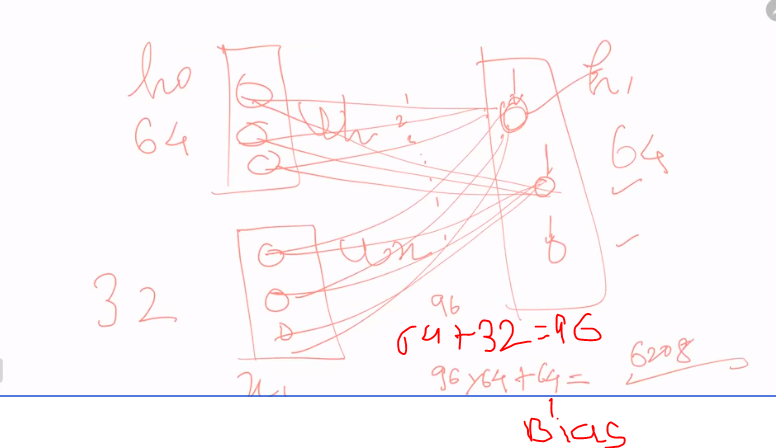

In [34]:
# Act(ht-1*Xt) + wh-> ht 
(64+32) * 64 + 64

6208

In [35]:
%%time
history1 = model.fit(X_train, train_label,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 132s 507ms/step - loss: 0.6937 - accuracy: 0.5089 - val_loss: 0.6913 - val_accuracy: 0.5161
Epoch 2/10
250/250 [==============================] - 124s 496ms/step - loss: 0.6934 - accuracy: 0.5073 - val_loss: 0.6933 - val_accuracy: 0.4979
Epoch 3/10
250/250 [==============================] - 113s 451ms/step - loss: 0.6953 - accuracy: 0.4951 - val_loss: 0.6935 - val_accuracy: 0.5027
Epoch 4/10
250/250 [==============================] - 108s 433ms/step - loss: 0.6936 - accuracy: 0.4995 - val_loss: 0.6933 - val_accuracy: 0.5026
Epoch 5/10
250/250 [==============================] - 104s 417ms/step - loss: 0.6938 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 6/10
250/250 [==============================] - 100s 399ms/step - loss: 0.6938 - accuracy: 0.4968 - val_loss: 0.6932 - val_accuracy: 0.4975
Epoch 7/10
250/250 [==============================] - 99s 397ms/step - loss: 0.6938 - accuracy: 0.4988 - val_loss: 0.6931 - 

<a name = Section31></a>
### **4.2 Model Evaluation**

In [36]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss , label="training_loss")
  plt.plot(epochs, val_loss, label ="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure() # if you want ne plot then we use this 
  plt.plot(epochs, accuracy , label="training_accuracy")
  plt.plot(epochs, val_accuracy, label ="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

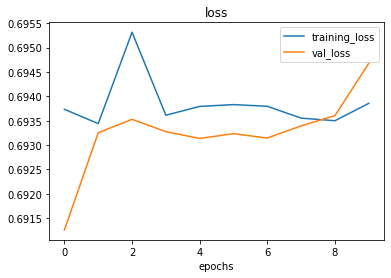

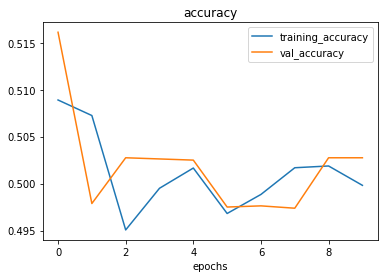

In [37]:
plot_loss_curves(history1)

**Observation:**

- The highest **accuracy** on validation dataset is **85%**

---
<a name = Section5></a>
# **5. LSTM Model**
---

<a name = Section51></a>
### **5.1 Model Building**

In [43]:
#lstm
model2 = Sequential()
model2.add(Embedding(10000,32, input_length=max_len_text))
model2.add(LSTM(50))
model2.add(Dropout(0.6))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 336,651
Trainable params: 336,651
Non-trainable params: 0
_________________________________________________________________


In [45]:
%%time
history2 = model2.fit(X_train, train_label,
epochs=20,
batch_size=128,
validation_split=0.2)

Epoch 1/20
250/250 [==============================] - 29s 107ms/step - loss: 0.6934 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5029
Epoch 2/20
250/250 [==============================] - 20s 78ms/step - loss: 0.6934 - accuracy: 0.4933 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 3/20
250/250 [==============================] - 15s 59ms/step - loss: 0.6933 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5027
Epoch 4/20
250/250 [==============================] - 13s 51ms/step - loss: 0.6933 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 5/20
250/250 [==============================] - 10s 42ms/step - loss: 0.6932 - accuracy: 0.5042 - val_loss: 0.6933 - val_accuracy: 0.4975
Epoch 6/20
250/250 [==============================] - 8s 34ms/step - loss: 0.6933 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.4981
Epoch 7/20
250/250 [==============================] - 7s 30ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6933 - val_accuracy: 

<a name = Section52></a>
### **5.2 Model Evaluation**

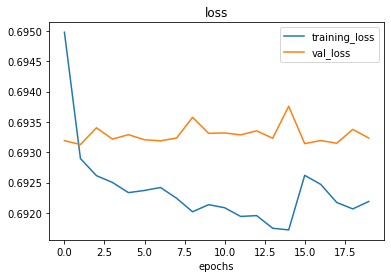

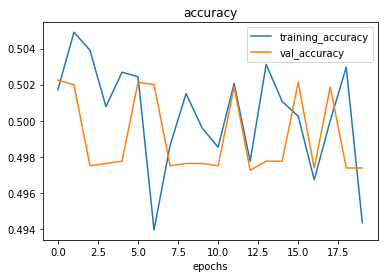

In [42]:
plot_loss_curves(history2)

**Observation:** 

- The highest **accuracy** on validation dataset is **86%**.

- We can clearly see **LSTM out performs SimpleRNN**.

---
<a name = Section6></a>
# **6. GRU Model**
---

<a name = Section51></a>
### **6.1 Model Building**

In [32]:
#GRU

model3 = Sequential()
model3.add(Embedding(10000,32, input_length=max_len_text))
model3.add(GRU(64))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 gru (GRU)                   (None, 64)                18816     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 338,881
Trainable params: 338,881
Non-trainable params: 0
_________________________________________________________________


In [34]:
%%time
history3 = model3.fit(X_train, train_label,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 190s 747ms/step - loss: 0.6935 - accuracy: 0.4978 - val_loss: 0.6937 - val_accuracy: 0.4974
Epoch 2/10
250/250 [==============================] - 190s 759ms/step - loss: 0.6935 - accuracy: 0.4963 - val_loss: 0.6933 - val_accuracy: 0.4974
Epoch 3/10
250/250 [==============================] - 191s 761ms/step - loss: 0.6934 - accuracy: 0.4943 - val_loss: 0.6936 - val_accuracy: 0.4974
Epoch 4/10
250/250 [==============================] - 190s 759ms/step - loss: 0.6934 - accuracy: 0.4924 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 5/10
250/250 [==============================] - 190s 763ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 6/10
250/250 [==============================] - 191s 766ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 7/10
250/250 [==============================] - 192s 769ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6932 -

<a name = Section52></a>
### **6.2 Model Evaluation**

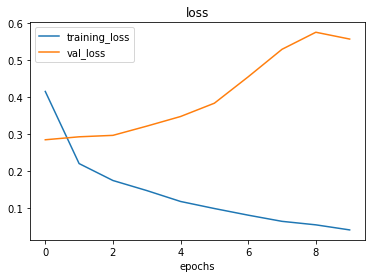

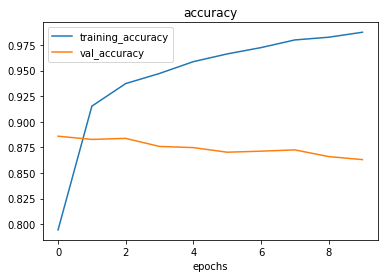

In [ ]:
plot_loss_curves(history3)

**Observations:**

- The highest **accuracy** on validation dataset is **86%**

- There seems to be **slight** improvement in **execution** time

#### The Values for Loss and Accuracy on Training and Validation Data for highest Accuracy on Validation Data

| Model | CPU Time for 10 Epochs(Google Colab) | Loss on Training Data | Loss on Validation Data | Accuracy on Training Data | Accuracy on Validation Data | 
| --- | --- | --- | --- | --- | --- |
| SimpleRNN Model | 8 Minutes | 0.0138  | 0.0138  | 0.9955  | 0.8551|
| LSTM Model | 31 Minutes | 0.0490 | 0.5775  | 0.9851 | 0.8679 |
| GRU Model | 26 Minutes | 0.0410 | 00.5572 | 0.9875 | 0.8630 |




**Obsertvation:** 

- We can observe that **LSTM** and **GRU** model performs better than the **simpleRNN** model.

---
<a name = Section7></a>
# **7. Conclusion**
---

- We have learned how we can **implementation** **SimpleRNN, LSTM and GRU** using Keras.

- We have seen the **performance** of these models and we can **observe** LSTM and GRU **out performs** SimpleRNN model.

- Now its up to you to further **explore** LSTM and GRU and **build** interesting **language models** and compare their **performance**.
